<a href="https://colab.research.google.com/github/KazumaShachou/DataScience/blob/master/Matplotlib__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Histograms, Binnings, and Density

In [95]:

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

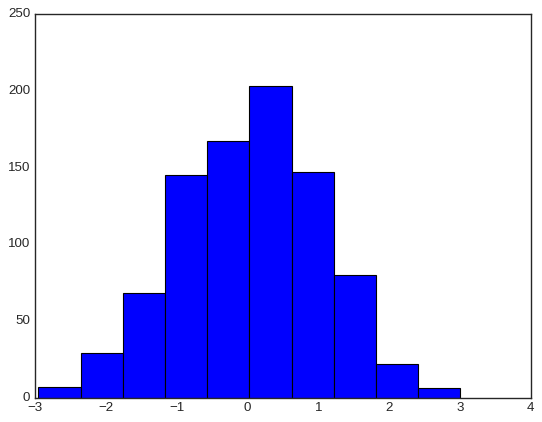

In [96]:
data = np.random.randn(874)
plt.hist(data);

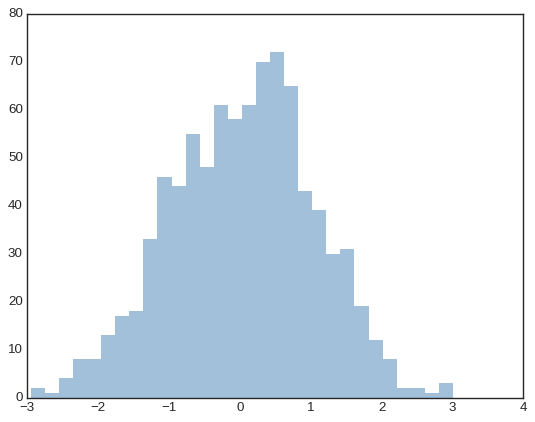

In [97]:
#customized histogram

plt.hist(data, bins=30, alpha=0.5,histtype='stepfilled', color='steelblue',edgecolor='none');

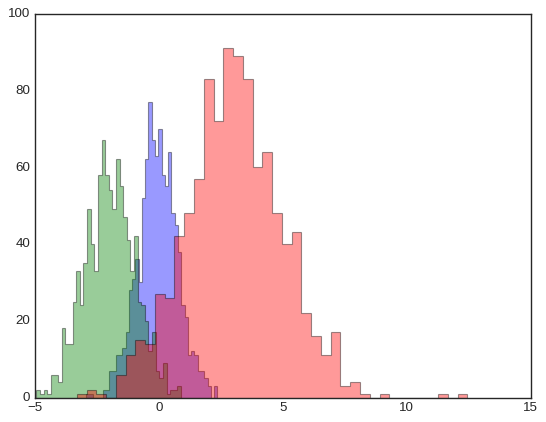

In [98]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype = 'stepfilled', alpha = 0.4, bins = 40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);


In [99]:
counts, bin_edges = np.histogram(data, bins = 5)
print(counts)

[ 36 213 370 227  28]


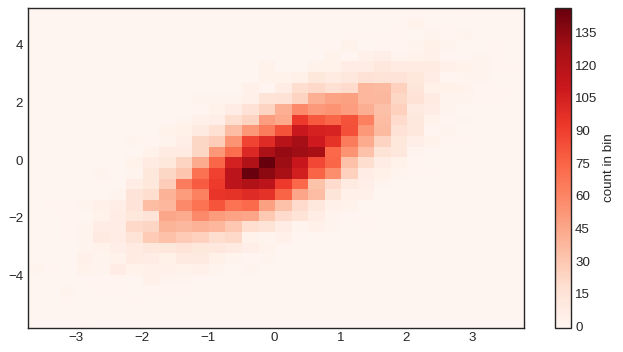

In [100]:
#Two-Dimensional Histograms and Binnings
plt.figure(figsize= (10,5))
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T


plt.hist2d(x, y, bins = 30, cmap = 'Reds')   #plot a two-dimensional histogram
cb = plt.colorbar()
cb.set_label('count in bin');

In [101]:
counts, xedges, yedges = np.histogram2d(x, y, bins = 30)


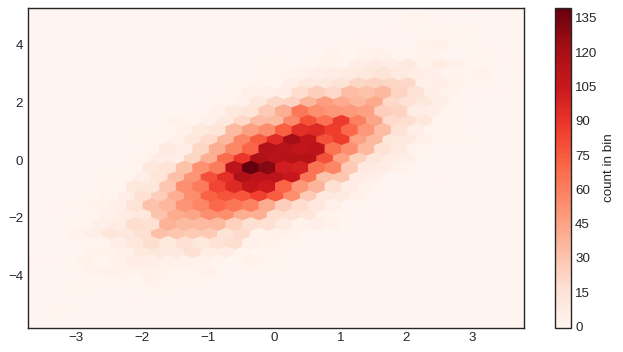

In [102]:
plt.figure(figsize= (10,5))
plt.hexbin(x, y, gridsize = 30, cmap = 'Reds')
cb = plt.colorbar(label = 'count in bin')

In [103]:
#Kernel density estimation
from scipy.stats import gaussian_kde

data = np.vstack([x, y])
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

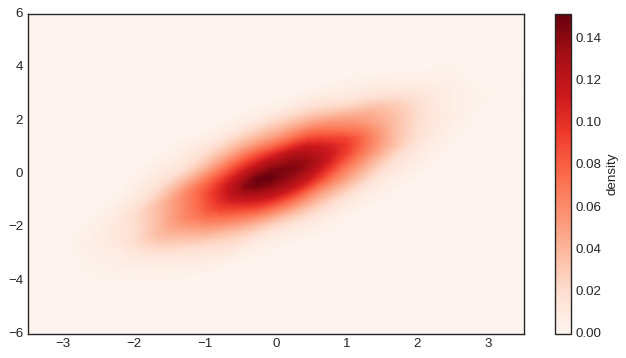

In [104]:
# Plot the result as an image
plt.figure(figsize=(10,5))
plt.imshow(Z.reshape(Xgrid.shape),origin='lower', aspect='auto',extent=[-3.5, 3.5, -6, 6],cmap='Reds')
cb = plt.colorbar()
cb.set_label("density")

## Customizing Plot Legends

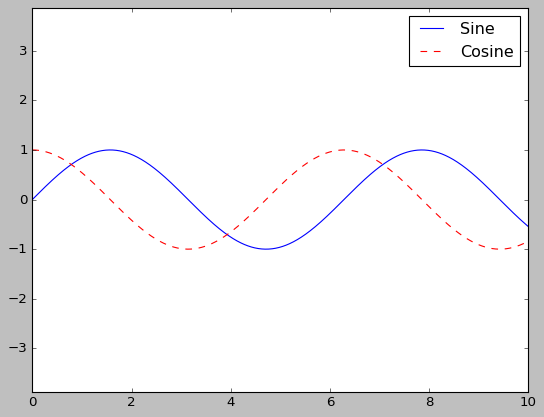

In [105]:
plt.style.use('classic')

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label = 'Sine')
ax.plot(x, np.cos(x), '--r', label = 'Cosine')
ax.axis('equal')
leg = ax.legend();

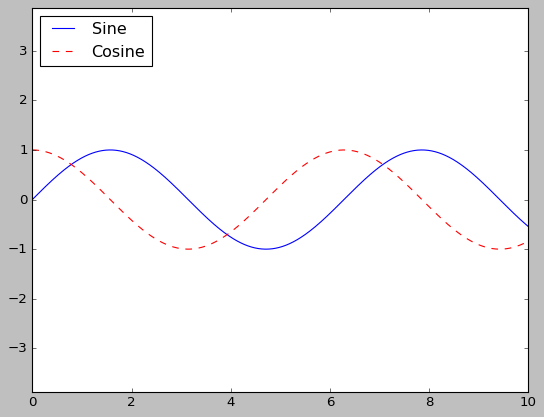

In [106]:
#specify the location of legend and turn off the frame
ax.legend(loc = 'upper left', frameon = 'False')
fig

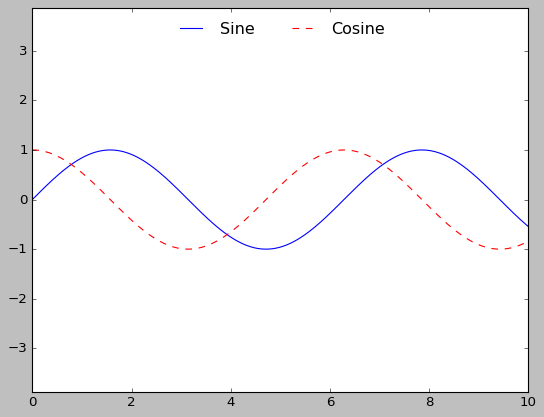

In [107]:
#number of columns in the legend
ax.legend(frameon= False, loc = 'upper center', ncol = 2)
fig

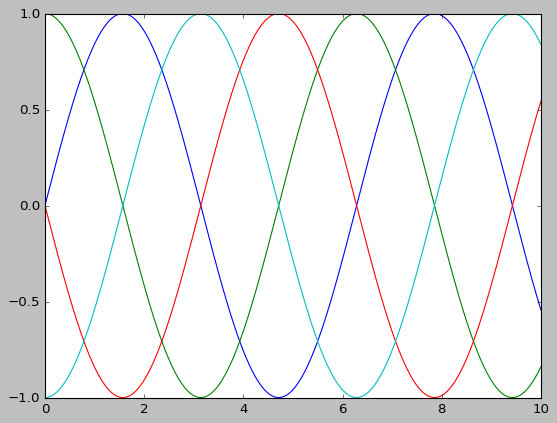

In [108]:
#Choosing Elements for the Legend
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)



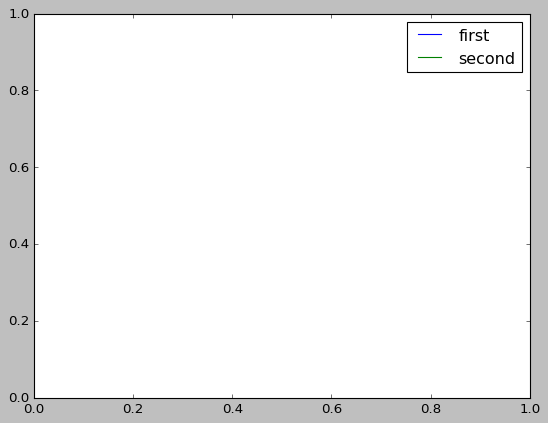

In [109]:
# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

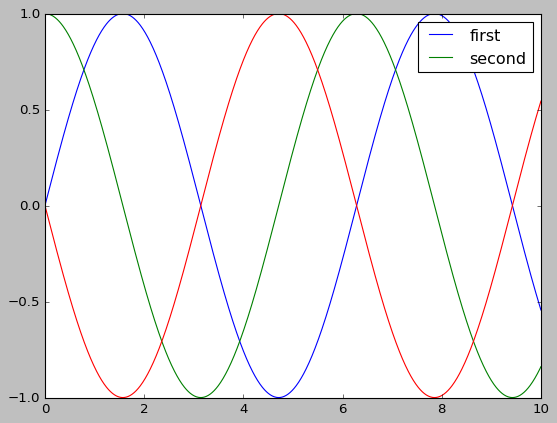

In [110]:

plt.plot(x, y[:, 0], label = 'first')
plt.plot(x, y[:, 1], label = 'second')
plt.plot(x, y[:, 2])
plt.legend(framealpha = 1, frameon = True);

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  if __name__ == '__main__':


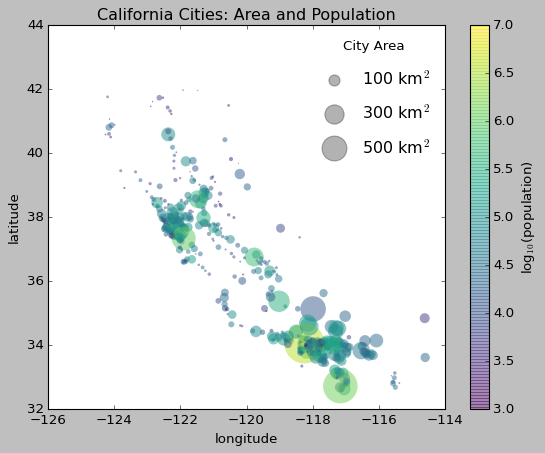

In [111]:

import pandas as pd 
cities = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv')

lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

plt.scatter(lon, lat, label=None,c=np.log10(population), cmap='viridis',s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')  
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

for area in [100, 300, 500]:
  plt.scatter([], [], c='k', alpha=0.3, s=area,label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='City Area');
plt.title('California Cities: Area and Population');



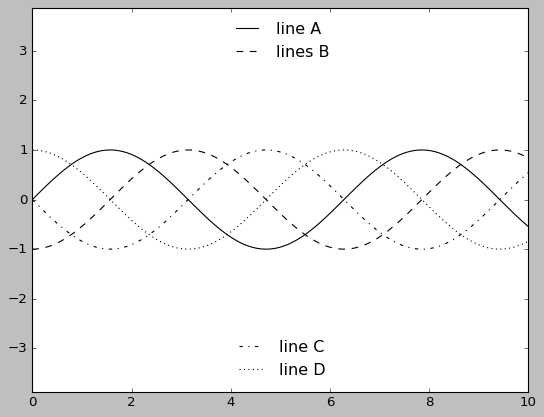

In [112]:
#Multiple Legends
fig, ax = plt.subplots()

lines=[]
styles= ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
  lines += ax.plot(x, np.sin(x - i * np.pi/2), styles[i], color = 'black')
ax.axis('equal')
ax.legend(lines[:2], ['line A', 'lines B'], loc = 'upper center', frameon = False)

# Create the second legend
from matplotlib.legend import Legend

leg = Legend(ax, lines[2:], ['line C', 'line D'], loc = 'lower center', frameon = False)
ax.add_artist(leg);

## Customizing Colorbars

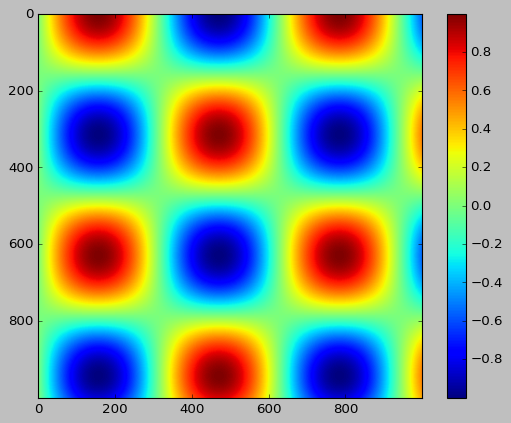

In [115]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

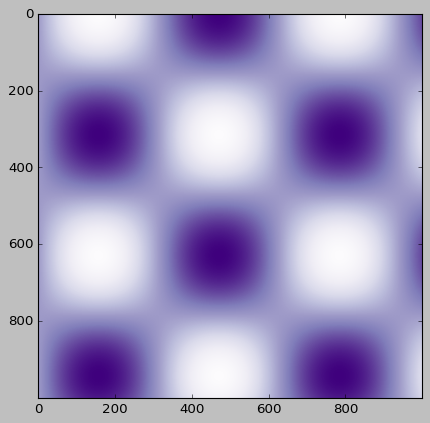

In [122]:
#Customizing Colorbars
plt.imshow(I, cmap = 'Purples_r');